# 0. Setup

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 색상
MAIN_COLOR = "#4a90e2"
ACCENT_COLOR = "#e94e77"

# Load data
cases = pd.read_csv("cases.csv")

# sex 정제
cases['sex'] = cases['sex'].astype(str).str.strip()
cases['sex_label'] = cases['sex'].map({'M':'Male','F':'Female'})

# 시간 파생 변수
cases['anesthesia_duration'] = cases['aneend'] - cases['anestart']
cases['surgery_duration'] = cases['opend'] - cases['opstart']
cases['case_duration'] = cases['caseend'] - cases['casestart']
cases['ane_to_op_delay'] = cases['opstart'] - cases['anestart']

# 1. Dataset Overview

In [96]:
cases.shape

(6388, 79)

In [97]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6388 entries, 0 to 6387
Data columns (total 79 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseid               6388 non-null   int64  
 1   subjectid            6388 non-null   int64  
 2   casestart            6388 non-null   int64  
 3   caseend              6388 non-null   int64  
 4   anestart             6388 non-null   int64  
 5   aneend               6388 non-null   float64
 6   opstart              6388 non-null   int64  
 7   opend                6388 non-null   int64  
 8   adm                  6388 non-null   int64  
 9   dis                  6388 non-null   int64  
 10  icu_days             6388 non-null   int64  
 11  death_inhosp         6388 non-null   int64  
 12  age                  6388 non-null   float64
 13  sex                  6388 non-null   object 
 14  height               6388 non-null   float64
 15  weight               6388 non-null   f

In [98]:
cases.isnull().sum()

caseid                 0
subjectid              0
casestart              0
caseend                0
anestart               0
                      ..
sex_label              0
anesthesia_duration    0
surgery_duration       0
case_duration          0
ane_to_op_delay        0
Length: 79, dtype: int64

In [99]:
cases.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
caseid,6388.0,NaN,NaN,NaN,3194.5,1844.201092,1.0,1597.75,3194.5,4791.25,6388.0
subjectid,6388.0,NaN,NaN,NaN,3047.726362,1757.857225,1.0,1532.75,3053.5,4569.25,6090.0
casestart,6388.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
caseend,6388.0,NaN,NaN,NaN,11348.680651,6658.506842,1640.0,6194.5,9924.5,15072.75,62494.0
anestart,6388.0,NaN,NaN,NaN,-757.002974,783.520044,-19065.0,-1090.25,-583.0,-277.0,1984.0
...,...,...,...,...,...,...,...,...,...,...,...
sex_label,6388,2,Male,3243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anesthesia_duration,6388.0,NaN,NaN,NaN,-565898.84784,46186823.958728,-3691468260.0,6720.0,10500.0,15600.0,111600.0
surgery_duration,6388.0,NaN,NaN,NaN,8159.12774,6069.70108,85.0,3600.0,6600.0,11400.0,57300.0
case_duration,6388.0,NaN,NaN,NaN,11348.680651,6658.506842,1640.0,6194.5,9924.5,15072.75,62494.0


# 2. Patient Characteristics
## 2.1 Age Distribution

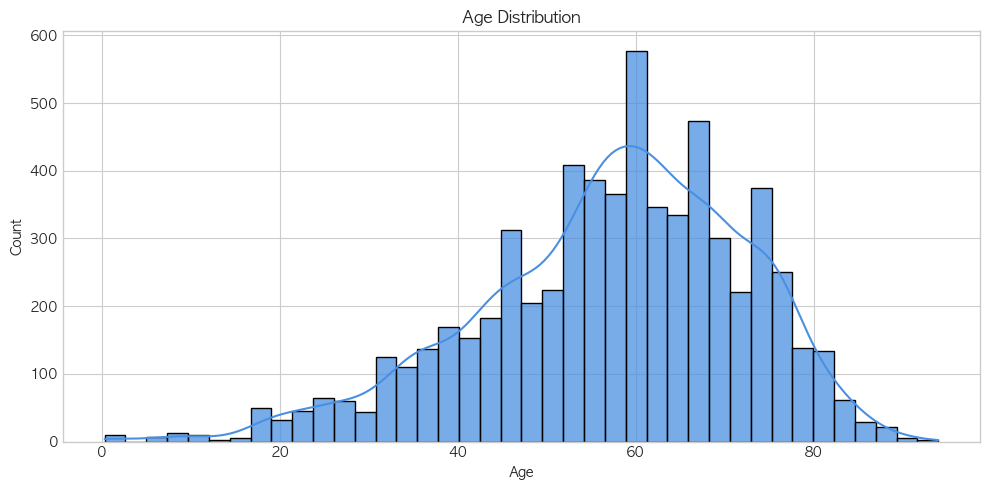

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(cases['age'], bins=40, kde=True, color=MAIN_COLOR, alpha=.75)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

In [101]:
# summary statistics
mean_age = cases['age'].mean()
median_age = cases['age'].median()
mean_age, median_age

(np.float64(57.2964934251722), np.float64(59.0))

In [102]:
bins = [0, 40, 60, 80, 120]
labels = ['<40', '40-60', '60-80', '80+']
cases['age_group'] = pd.cut(cases['age'], bins=bins, labels=labels, include_lowest=True)

In [103]:
age_group_ratio = (cases['age_group'].value_counts(normalize=True) * 100).sort_index()
age_group_ratio

age_group
<40      13.775830
40-60    40.936130
60-80    42.031935
80+       3.256105
Name: proportion, dtype: float64

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/3956768411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


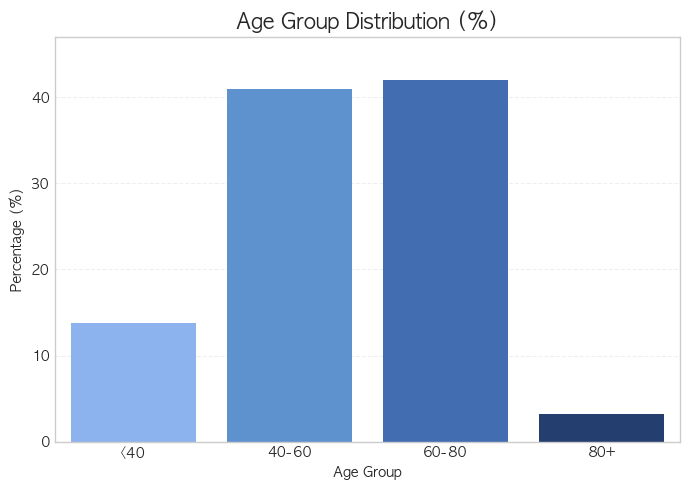

In [104]:
plt.figure(figsize=(7,5))
sns.barplot(
    x=age_group_ratio.index,
    y=age_group_ratio.values,
    palette=["#7dafff", "#4a90e2", "#2f69c3", "#163a7c"]
)
plt.title("Age Group Distribution (%)", fontsize=15)
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.ylim(0, max(age_group_ratio.values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 2.2 Sex Distribution

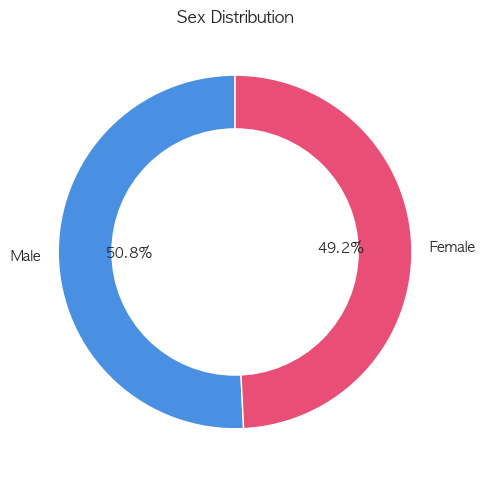

In [105]:
counts = cases['sex_label'].value_counts()

fig, ax = plt.subplots(figsize=(5,5))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=[MAIN_COLOR, ACCENT_COLOR],
    wedgeprops={'edgecolor':'white'}
)

centre = plt.Circle((0,0),0.7,fc='white')
fig.gca().add_artist(centre)

plt.title("Sex Distribution")
plt.tight_layout()
plt.show()

In [106]:
# summary
sex_counts = cases['sex_label'].value_counts()
sex_ratio = cases['sex_label'].value_counts(normalize=True)*100
sex_counts, sex_ratio

(sex_label
 Male      3243
 Female    3145
 Name: count, dtype: int64,
 sex_label
 Male      50.767063
 Female    49.232937
 Name: proportion, dtype: float64)

## 2.3 BMI Distribution

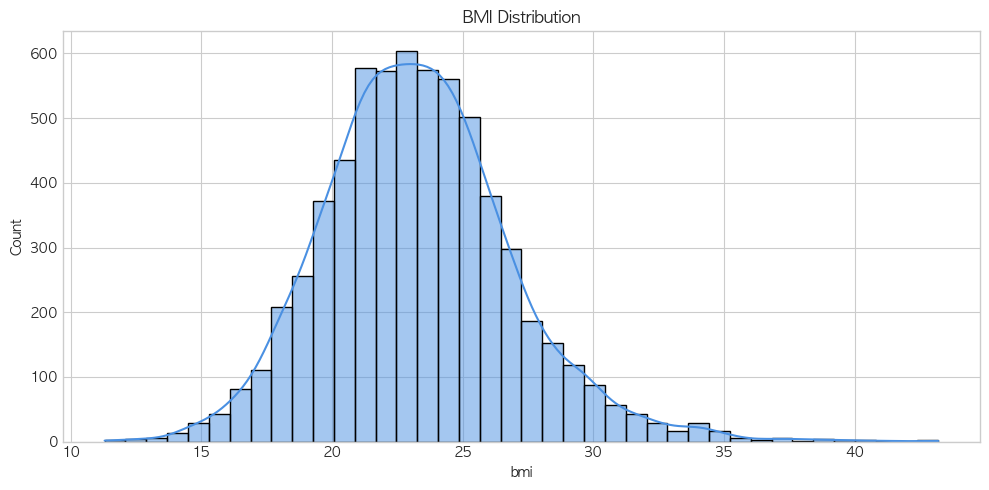

In [107]:
plt.figure(figsize=(10,5))
sns.histplot(cases['bmi'], bins=40, kde=True, color=MAIN_COLOR)
plt.title("BMI Distribution")
plt.tight_layout()
plt.show()

In [151]:
# BMI summary stats
bmi_desc = cases['bmi'].describe()

# Obesity ratio
obese_ratio = (cases['bmi'] >= 30).mean() * 100

# Combine into one table
bmi_table = pd.DataFrame({
    "BMI Stats": bmi_desc,
})

bmi_table.loc["obesity(>=30%)"] = obese_ratio

bmi_table

,BMI Stats
count,6388.000000
mean,23.278522
std,3.623655
min,11.300000
25%,20.900000
50%,23.100000
75%,25.400000
max,43.200000
obesity(>=30%),4.085786


## 2.4 ASA Classification

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/3934829157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='asa', data=cases, palette="Blues")


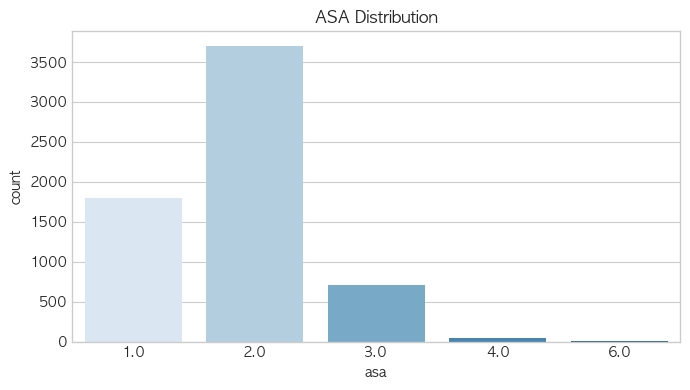

In [109]:
plt.figure(figsize=(7,4))
sns.countplot(x='asa', data=cases, palette="Blues")
plt.title("ASA Distribution")
plt.tight_layout()
plt.show()

In [110]:
# summary
high_risk_ratio = (cases['asa'] >= 3).mean()*100
cases['asa'].value_counts(), high_risk_ratio

(asa
 2.0    3699
 1.0    1792
 3.0     703
 4.0      48
 6.0      13
 Name: count, dtype: int64,
 np.float64(11.959924859110833))

## 2.5 Emergency Surgery (emop)

In [111]:
# summary
emop_ratio = cases['emop'].mean()*100
emop_ratio

np.float64(12.241703193487789)

In [112]:
# emop vs mortality
pd.crosstab(cases['emop'], cases['death_inhosp'], normalize='index')*100

death_inhosp,0,1
emop,,
0,99.500535,0.499465
1,96.291560,3.708440


## 2.6 Preoperative Comorbidity (DM, HTN)

In [113]:
dm_rate = cases['preop_dm'].mean()*100
htn_rate = cases['preop_htn'].mean()*100
dm_rate, htn_rate

(np.float64(10.347526612398248), np.float64(30.76080150281778))

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/2336605905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


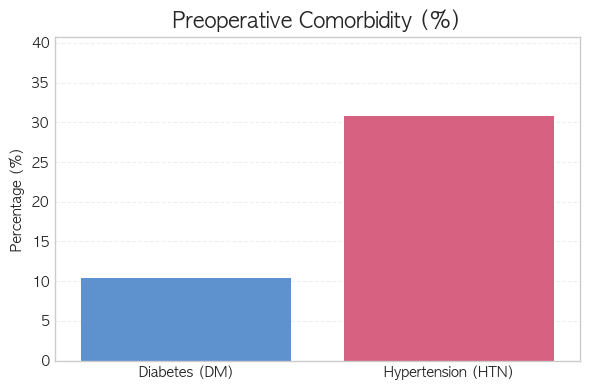

In [114]:
comorbidity_labels = ['Diabetes (DM)', 'Hypertension (HTN)']
comorbidity_values = [dm_rate, htn_rate]

plt.figure(figsize=(6,4))
sns.barplot(
    x=comorbidity_labels,
    y=comorbidity_values,
    palette=["#4a90e2", "#e94e77"]
)
plt.title("Preoperative Comorbidity (%)", fontsize=15)
plt.ylabel("Percentage (%)")
plt.ylim(0, max(comorbidity_values) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 2.7 Preoperative ECG & Lab (Hb, K, Na)

In [115]:
cases[['preop_hb','preop_k','preop_na','preop_ecg']].describe()

,preop_hb,preop_k,preop_na
count,6047.00000,5767.000000,5765.000000
mean,12.83319,4.196411,140.026366
std,1.98949,0.408209,2.895233
min,3.50000,2.500000,111.000000
25%,11.60000,3.900000,139.000000
50%,13.00000,4.200000,140.000000
75%,14.20000,4.400000,142.000000
max,20.20000,8.400000,150.000000


In [116]:
abnormal_k = ((cases['preop_k']<3.5)|(cases['preop_k']>5)).mean()*100
anemia_rate = (cases['preop_hb']<12).mean()*100
abnormal_k, anemia_rate

(np.float64(4.727614276768942), np.float64(28.036944270507203))

## 2.8 Age vs ASA Analysis

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/2764355459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


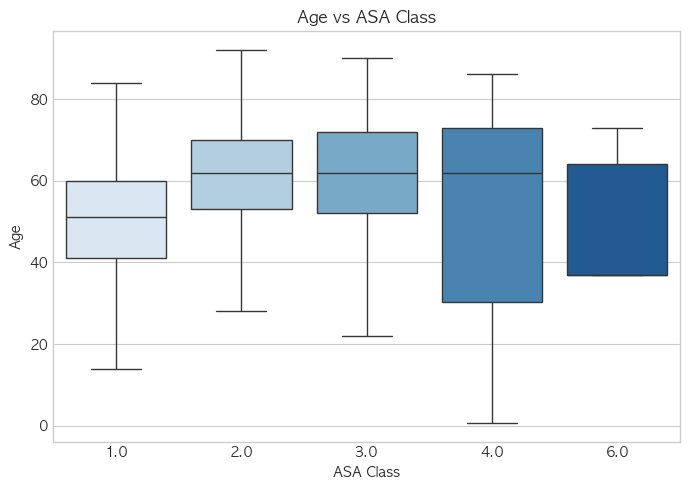

In [117]:
# Age vs ASA Boxplot
plt.figure(figsize=(7,5))
sns.boxplot(
    x='asa',
    y='age',
    data=cases,
    palette="Blues",
    showfliers=False
)
plt.title("Age vs ASA Class")
plt.xlabel("ASA Class")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

In [118]:
# Age Group × ASA Cross-table
pd.crosstab(
    cases['age_group'],
    cases['asa'],
    normalize='index'
) * 100

asa,1.0,2.0,3.0,4.0,6.0
age_group,,,,,
<40,50.467290,35.981308,10.981308,1.518692,1.051402
40-60,36.494926,54.410617,8.743169,0.351288,0.000000
60-80,15.743551,70.485584,12.822458,0.796662,0.151745
80+,4.975124,69.154229,23.383085,2.487562,0.000000


In [119]:
# Age–ASA 상관계수
cases[['age','asa']].corr(method='spearman')

,age,asa
age,1.000000,0.282659
asa,0.282659,1.000000


# 3. Surgery Characteristics
## 3.1 Anesthesia Duration (hrs)

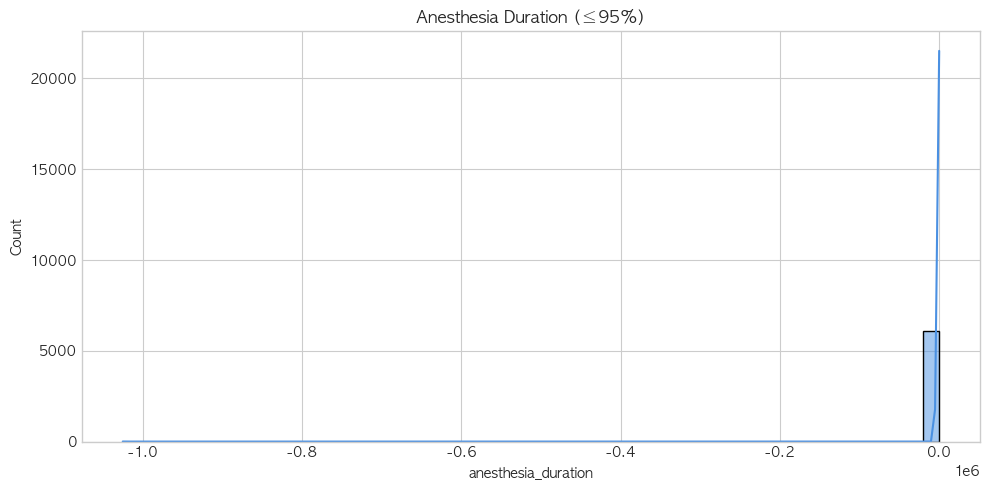

In [120]:
q95 = cases['anesthesia_duration'].quantile(.95)
plt.figure(figsize=(10,5))
sns.histplot(cases[cases['anesthesia_duration']<q95]['anesthesia_duration']/3600,
             bins=50, kde=True, color=MAIN_COLOR)
plt.title("Anesthesia Duration (≤95%)")
plt.tight_layout()
plt.show()

In [121]:
# IQR
an_hr = cases['anesthesia_duration']/3600
Q1 = an_hr.quantile(.25)
Q2 = an_hr.quantile(.50)
Q3 = an_hr.quantile(.75)
IQR = Q3 - Q1
Q1, Q2, Q3, IQR

(np.float64(1.8666666665972222),
 np.float64(2.9166666666666665),
 np.float64(4.333333333333333),
 np.float64(2.466666666736111))

## 3.2 Surgery Duration (hrs)

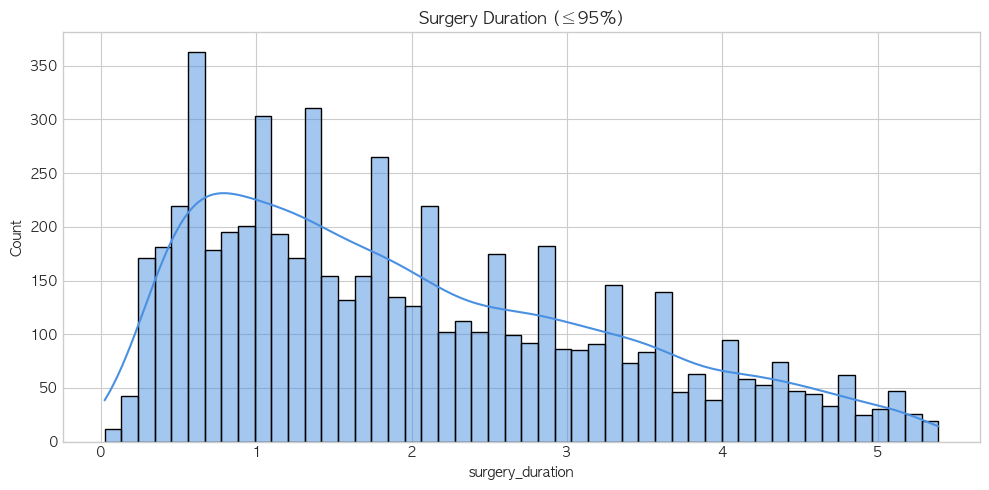

In [122]:
q95 = cases['surgery_duration'].quantile(.95)
plt.figure(figsize=(10,5))
sns.histplot(cases[cases['surgery_duration']<q95]['surgery_duration']/3600,
             bins=50, kde=True, color=MAIN_COLOR)
plt.title("Surgery Duration (≤95%)")
plt.tight_layout()
plt.show()

## 3.3 ASA vs Surgery Duration

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/3212489528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


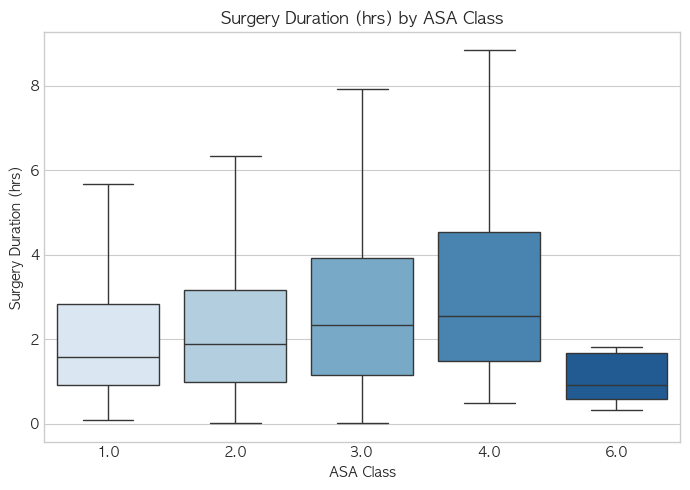

In [123]:
# boxplot
plt.figure(figsize=(7,5))
sns.boxplot(
    x='asa',
    y=cases['surgery_duration']/3600,
    data=cases,
    palette="Blues",
    showfliers=False
)
plt.title("Surgery Duration (hrs) by ASA Class")
plt.xlabel("ASA Class")
plt.ylabel("Surgery Duration (hrs)")
plt.tight_layout()
plt.show()

In [124]:
# ASA별 평균 수술시간
(cases.groupby('asa')['surgery_duration'].mean()/3600).round(2)

asa
1.0    2.01
2.0    2.29
3.0    2.70
4.0    3.46
6.0    1.53
Name: surgery_duration, dtype: float64

In [125]:
# ASA별 중앙 수술시간
(cases.groupby('asa')['surgery_duration'].median()/3600).round(2)

asa
1.0    1.58
2.0    1.90
3.0    2.33
4.0    2.56
6.0    0.92
Name: surgery_duration, dtype: float64

In [126]:
# 상관계수
cases[['asa','surgery_duration']].corr(method='spearman')

,asa,surgery_duration
asa,1.000000,0.104885
surgery_duration,0.104885,1.000000


## 3.4 Anesthesia vs Surgery Duration (Scatter)

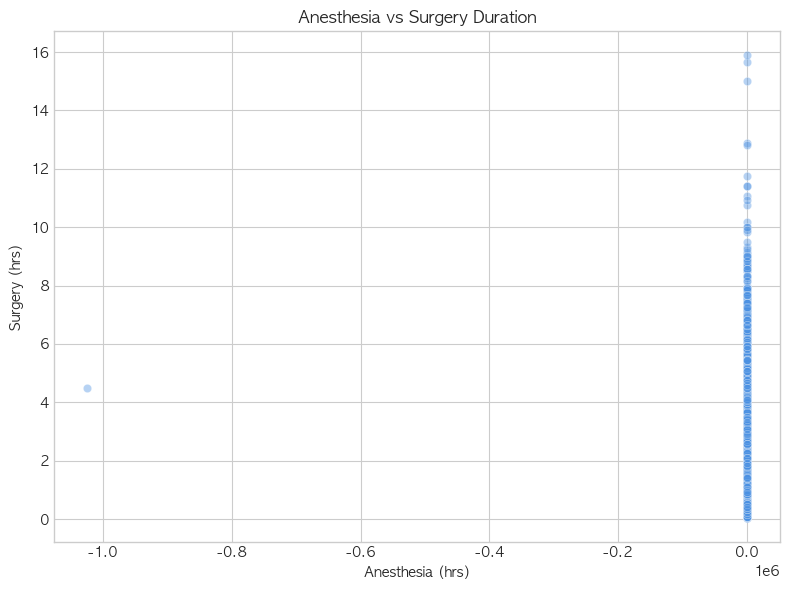

In [127]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=cases['anesthesia_duration']/3600,
    y=cases['surgery_duration']/3600,
    alpha=0.4, color=MAIN_COLOR
)
plt.xlabel("Anesthesia (hrs)")
plt.ylabel("Surgery (hrs)")
plt.title("Anesthesia vs Surgery Duration")
plt.tight_layout()
plt.show()

# 4. Outcome Analysis
## 4.1 Mortality Distribution

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/908734961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='death_inhosp', data=cases, palette="Blues")


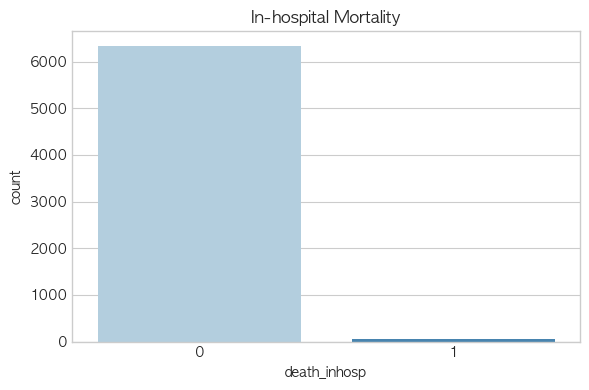

In [128]:
plt.figure(figsize=(6,4))
sns.countplot(x='death_inhosp', data=cases, palette="Blues")
plt.title("In-hospital Mortality")
plt.tight_layout()
plt.show()

In [129]:
# summary
death_ratio = cases['death_inhosp'].mean()*100
death_ratio

np.float64(0.8922980588603632)

## 4.2 Age Group vs Mortality

In [130]:
# Age group 생성
bins = [0,40,60,80,200]
labels = ['<40','40-60','60-80','80+']
cases['age_group'] = pd.cut(cases['age'], bins=bins, labels=labels, include_lowest=True)

In [131]:
# 절대건수 Cross-table
age_abs = pd.crosstab(cases['age_group'], cases['death_inhosp'])
print("=== Absolute Counts (Age Group vs death_inhosp) ===")
display(age_abs)
print("\nNote: death_inhosp → 0 = Alive, 1 = Death\n")

=== Absolute Counts (Age Group vs death_inhosp) ===


death_inhosp,0,1
age_group,,
<40,868,12
40-60,2599,16
60-80,2661,24
80+,203,5



Note: death_inhosp → 0 = Alive, 1 = Death



In [132]:
# 퍼센트 Cross-table
age_pct = pd.crosstab(
    cases['age_group'],
    cases['death_inhosp'],
    normalize='index'
) * 100
print("=== Percentage (Age Group vs death_inhosp) ===")
display(age_pct)
print("\nNote: death_inhosp → 0 = Alive, 1 = Death\n")

=== Percentage (Age Group vs death_inhosp) ===


death_inhosp,0,1
age_group,,
<40,98.636364,1.363636
40-60,99.388145,0.611855
60-80,99.106145,0.893855
80+,97.596154,2.403846



Note: death_inhosp → 0 = Alive, 1 = Death



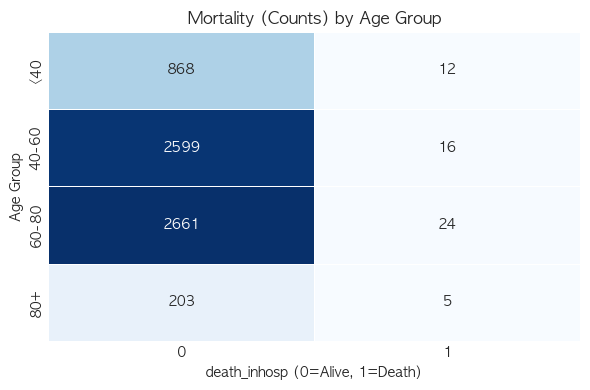

In [133]:
# 절대건수 히트맵
plt.figure(figsize=(6,4))
sns.heatmap(
    age_abs,
    annot=True, fmt="d",
    cmap="Blues",
    linewidths=0.5,
    cbar=False
)
plt.title("Mortality (Counts) by Age Group")
plt.xlabel("death_inhosp (0=Alive, 1=Death)")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

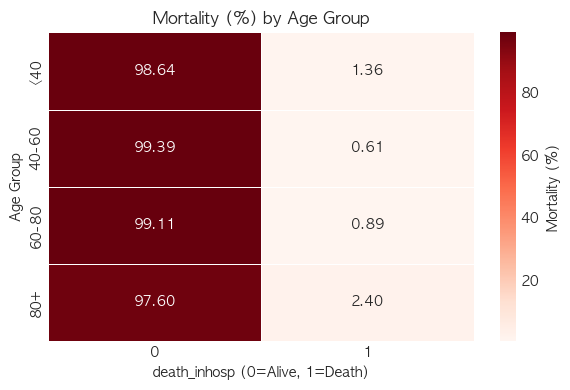

In [134]:
# 퍼센트 히트맵
plt.figure(figsize=(6,4))
sns.heatmap(
    age_pct,
    annot=True, fmt=".2f",
    cmap="Reds",
    linewidths=0.5,
    cbar_kws={'label': 'Mortality (%)'}
)
plt.title("Mortality (%) by Age Group")
plt.xlabel("death_inhosp (0=Alive, 1=Death)")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

## 4.3 ASA × Mortality (Heatmap)

In [135]:
# 절대건수 Cross-table
asa_abs = pd.crosstab(cases['asa'], cases['death_inhosp'])
print("=== Absolute Counts (ASA vs death_inhosp) ===")
display(asa_abs)
print("\nNote: death_inhosp → 0 = Alive, 1 = Death\n")

=== Absolute Counts (ASA vs death_inhosp) ===


death_inhosp,0,1
asa,,
1.0,1783,9
2.0,3682,17
3.0,686,17
4.0,36,12
6.0,13,0



Note: death_inhosp → 0 = Alive, 1 = Death



In [136]:
# 퍼센트 Cross-table
asa_pct = pd.crosstab(
    cases['asa'],
    cases['death_inhosp'],
    normalize='index'
) * 100
print("=== Percentage (ASA vs death_inhosp) ===")
display(asa_pct)
print("\nNote: death_inhosp → 0 = Alive, 1 = Death\n")

=== Percentage (ASA vs death_inhosp) ===


death_inhosp,0,1
asa,,
1.0,99.497768,0.502232
2.0,99.540416,0.459584
3.0,97.581792,2.418208
4.0,75.000000,25.000000
6.0,100.000000,0.000000



Note: death_inhosp → 0 = Alive, 1 = Death



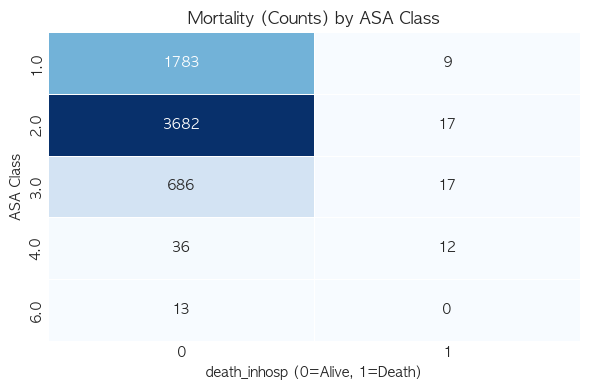

In [137]:
# 절대건수 히트맵
plt.figure(figsize=(6,4))
sns.heatmap(
    asa_abs,
    annot=True, fmt="d",
    cmap="Blues",
    linewidths=0.5,
    cbar=False
)
plt.title("Mortality (Counts) by ASA Class")
plt.xlabel("death_inhosp (0=Alive, 1=Death)")
plt.ylabel("ASA Class")
plt.tight_layout()
plt.show()

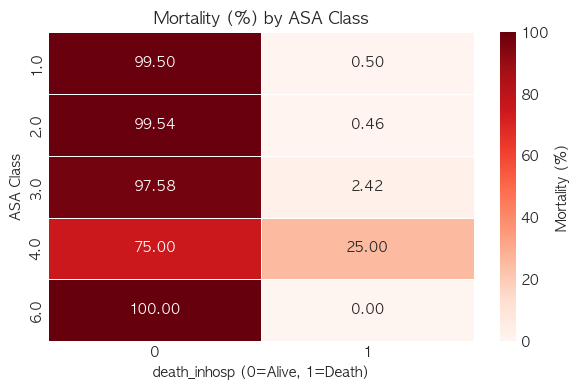

In [138]:
# 퍼센트 히트맵
plt.figure(figsize=(6,4))
sns.heatmap(
    asa_pct,
    annot=True, fmt=".2f",
    cmap="Reds",
    linewidths=0.5,
    cbar_kws={'label': 'Mortality (%)'}
)
plt.title("Mortality (%) by ASA Class")
plt.xlabel("death_inhosp (0=Alive, 1=Death)")
plt.ylabel("ASA Class")
plt.tight_layout()
plt.show()

## 4.4 emop vs Mortality

In [139]:
# 절대건수 cross-table
print("=== Absolute Counts (emop vs death_inhosp) ===")
emop_abs = pd.crosstab(cases['emop'], cases['death_inhosp'])
display(emop_abs)
print("\nNote: death_inhosp → 0 = Alive, 1 = Death\n")

=== Absolute Counts (emop vs death_inhosp) ===


death_inhosp,0,1
emop,,
0,5578,28
1,753,29



Note: death_inhosp → 0 = Alive, 1 = Death



In [140]:
# 퍼센트 Cross-table
emop_pct = pd.crosstab(
    cases['emop'],
    cases['death_inhosp'],
    normalize='index'
) * 100
display(emop_pct)
print("\nNote: death_inhosp → 0 = Alive, 1 = Death\n")

death_inhosp,0,1
emop,,
0,99.500535,0.499465
1,96.291560,3.708440



Note: death_inhosp → 0 = Alive, 1 = Death



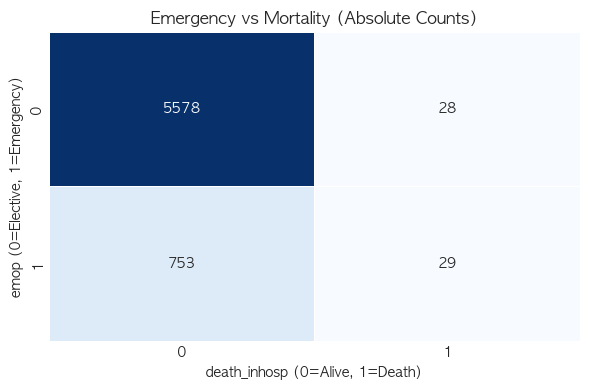

In [141]:
# 절대건수 히트맵
plt.figure(figsize=(6,4))
sns.heatmap(
    emop_abs,
    annot=True, fmt="d", cmap="Blues",
    linewidths=.5, cbar=False
)
plt.title("Emergency vs Mortality (Absolute Counts)")
plt.xlabel("death_inhosp (0=Alive, 1=Death)")
plt.ylabel("emop (0=Elective, 1=Emergency)")
plt.tight_layout()
plt.show()

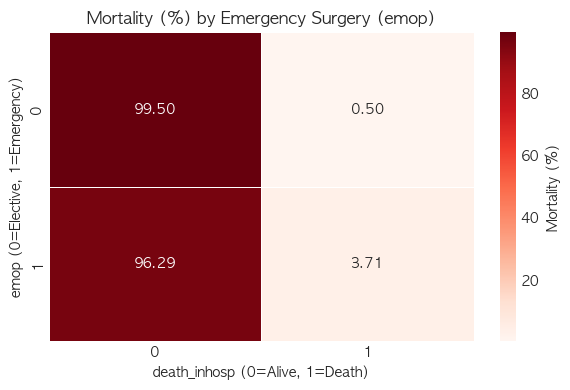

In [142]:
# 퍼센트 히트맵
plt.figure(figsize=(6,4))
sns.heatmap(
    emop_pct,
    annot=True, fmt=".2f",
    cmap="Reds",
    linewidths=0.5,
    cbar_kws={'label': 'Mortality (%)'}
)
plt.title("Mortality (%) by Emergency Surgery (emop)")
plt.xlabel("death_inhosp (0=Alive, 1=Death)")
plt.ylabel("emop (0=Elective, 1=Emergency)")
plt.tight_layout()
plt.show()

## 4.5 Surgery Duration vs Mortality

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/4029882245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='death_inhosp', y=cases['surgery_duration']/3600,


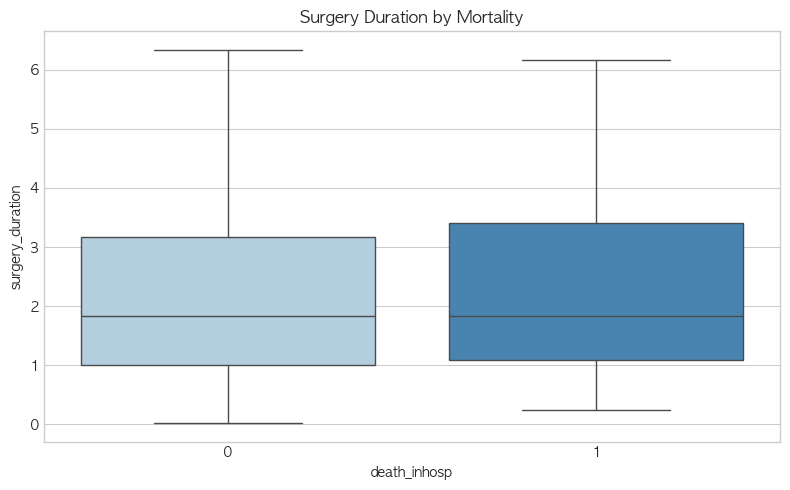

In [143]:
# boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='death_inhosp', y=cases['surgery_duration']/3600,
            data=cases, palette="Blues", showfliers=False)
plt.title("Surgery Duration by Mortality")
plt.tight_layout()
plt.show()

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/3673595291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='death_inhosp', y=cases['surgery_duration']/3600,


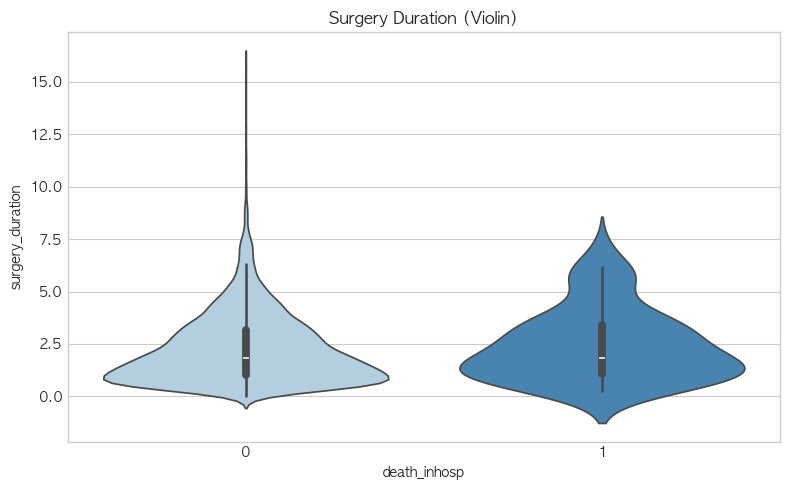

In [144]:
# violin
plt.figure(figsize=(8,5))
sns.violinplot(x='death_inhosp', y=cases['surgery_duration']/3600,
               data=cases, palette="Blues")
plt.title("Surgery Duration (Violin)")
plt.tight_layout()
plt.show()

## 4.6 ICU Stay

In [145]:
icu_rate = (cases['icu_days']>0).mean()*100
icu_days_desc = cases['icu_days'].describe()
icu_rate, icu_days_desc

(np.float64(18.847839699436445),
 count    6388.000000
 mean        0.552755
 std         3.412307
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max       179.000000
 Name: icu_days, dtype: float64)

# 5. Department & Operation Type
## 5.1 Department

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/3416668063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Blues_r")


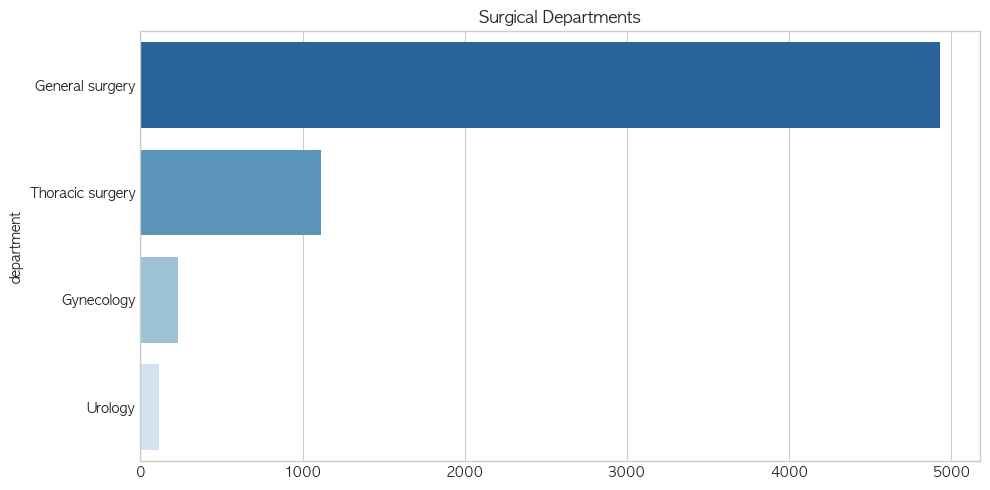

department
General surgery     4930
Thoracic surgery    1111
Gynecology           230
Urology              117
Name: count, dtype: int64

In [146]:
dept_counts = cases['department'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Blues_r")
plt.title("Surgical Departments")
plt.tight_layout()
plt.show()

dept_counts

## 5.2 Operation Type

/var/folders/f9/ccx4jpsx2ks0z9klh6b0y9tc0000gn/T/ipykernel_1189/4146399334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=optype_counts.values, y=optype_counts.index, palette="Greens_r")


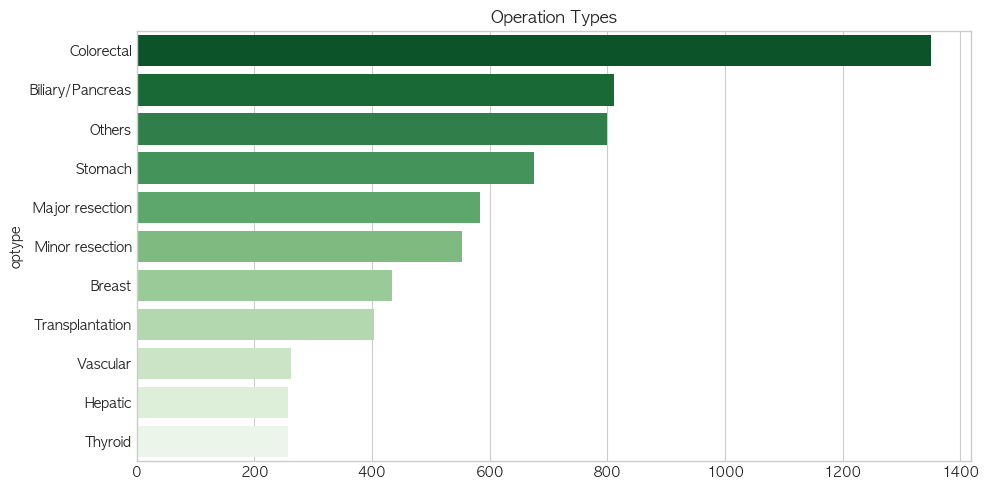

optype
Colorectal          1350
Biliary/Pancreas     812
Others               799
Stomach              676
Major resection      584
Minor resection      553
Breast               434
Transplantation      403
Vascular             262
Hepatic              258
Thyroid              257
Name: count, dtype: int64

In [147]:
optype_counts = cases['optype'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=optype_counts.values, y=optype_counts.index, palette="Greens_r")
plt.title("Operation Types")
plt.tight_layout()
plt.show()

optype_counts

# 6. Additional Case-Level Features
## 6.1 Comorbidity Cross Tables

In [148]:
pd.crosstab(cases['preop_dm'], cases['death_inhosp'], normalize='index')*100
pd.crosstab(cases['preop_htn'], cases['death_inhosp'], normalize='index')*100

death_inhosp,0,1
preop_htn,,
0,99.140855,0.859145
1,99.033079,0.966921


## 6.2 LOS (Length of Stay)

In [149]:
cases['los_days'] = (cases['dis'] - cases['adm']) / (24*3600)
cases['los_days'].describe()

count    6388.000000
mean       10.472605
std        14.931167
min         0.000000
25%         4.000000
50%         7.000000
75%        11.000000
max       248.000000
Name: los_days, dtype: float64

# 7. Correlation Analysis

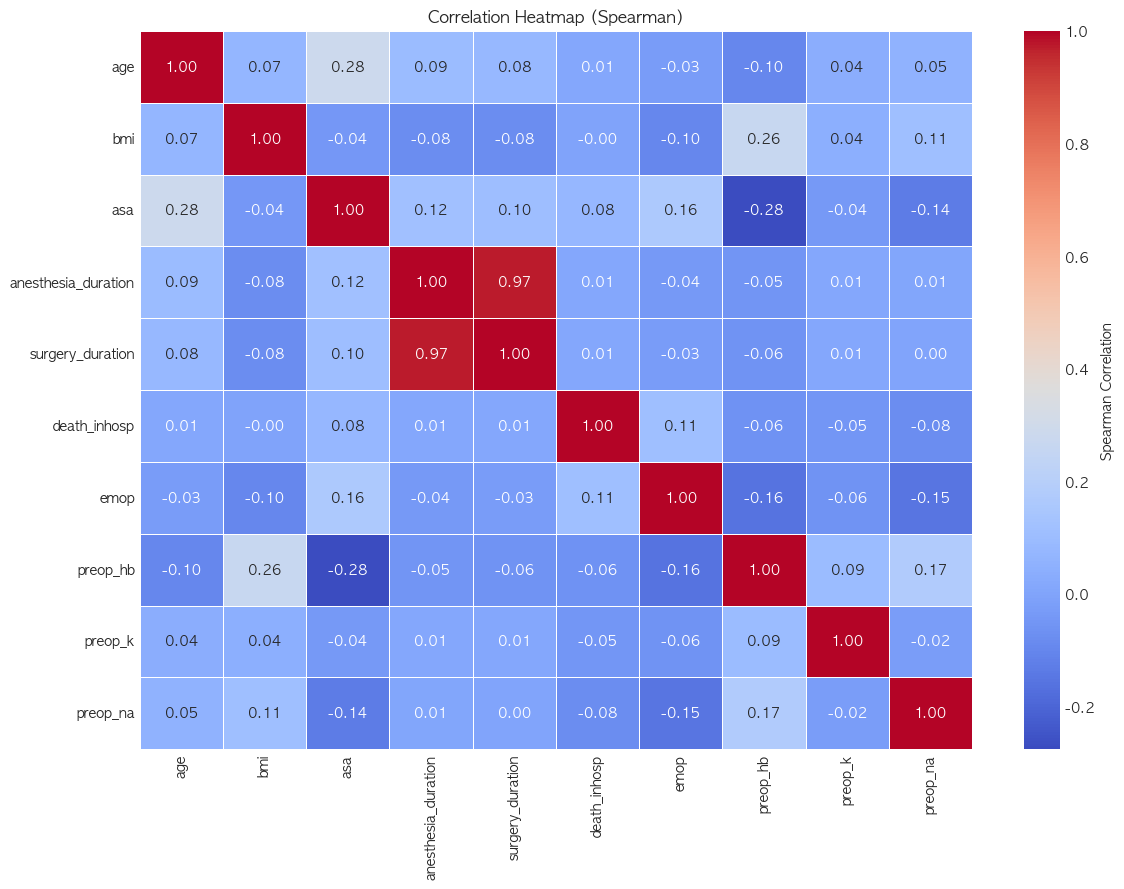

In [150]:
numeric_cols = [
    'age',             # 나이
    'bmi',             # BMI
    'asa',             # ASA 등급
    'anesthesia_duration',   # 마취 시간
    'surgery_duration',      # 수술 시간
    'death_inhosp',    # 사망 여부 (0/1)
    'emop',            # 응급 여부 (0/1)
    'preop_hb',        # Hb
    'preop_k',         # K+
    'preop_na'         # Na+
]

corr = cases[numeric_cols].corr(method='spearman')

plt.figure(figsize=(12,9))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Spearman Correlation'}
)
plt.title("Correlation Heatmap (Spearman)")
plt.tight_layout()
plt.show()
